# HPM ANALYSIS 


In [1]:
# Import dependencies 

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
# read in data file 
data_file = pd.read_csv('AnalysisHPM.csv')
data_file.head()

,Day_of_the_week,Date,Readers,WC_Pageviews,Product_Clicks,CTR,NYT_HP_Users,NYT_HP_Pageviews,Ratio_WC/NYT
0,Wednesday,7/14,76894,99553,9886,9.9%,3103960,14242855,0.70%
1,Thursday,7/15,218714,298553,33472,11.2%,3146798,14097877,2.12%
2,Friday,7/16,262093,390684,57233,14.6%,3005451,13897691,2.81%
3,Saturday,7/17,255866,361521,39748,11.0%,2823989,12877267,2.81%
4,Sunday,7/18,243345,335314,69987,20.9%,2916172,13311426,2.52%


In [3]:
# Fetch the columns needed from the data frame 
WC_Pageviews = data_file["WC_Pageviews"].tolist()
NYT_HP_Pageviews = data_file['NYT_HP_Pageviews'].tolist()

In [4]:
# Convert string into int with a list comprehension
WC_Pageviews = [int(x) for x in WC_Pageviews] 
NYT_HP_Pageviews = [int(x) for x in NYT_HP_Pageviews] 

In [5]:
# Apply linear regression model 
linregress(NYT_HP_Pageviews,WC_Pageviews)

LinregressResult(slope=0.00010718208712798624, intercept=201526.70291893807, rvalue=0.006158816382505692, pvalue=0.9239079065323483, stderr=0.0011210066664913755, intercept_stderr=20048.647550994578)

In [13]:
# Save the results as a touple 
(slope, intercept, rval, pval, stderr) = linregress(NYT_HP_Pageviews,WC_Pageviews)

# get the equation of the line 

line_eq = (f"y = {round(slope,5)}x + {round(intercept,3)}")
print(f"The equation of the line is:")
print(line_eq)
print(f"The p-value is: {pval:.3f}")

The equation of the line is:
y = 0.00011x + 201526.703
The p-value is: 0.924


In [7]:
# Obtain regress values by plugging in values in the equation of line formula 
regress_values = [(NYT_HP * slope + intercept ) for NYT_HP in NYT_HP_Pageviews]

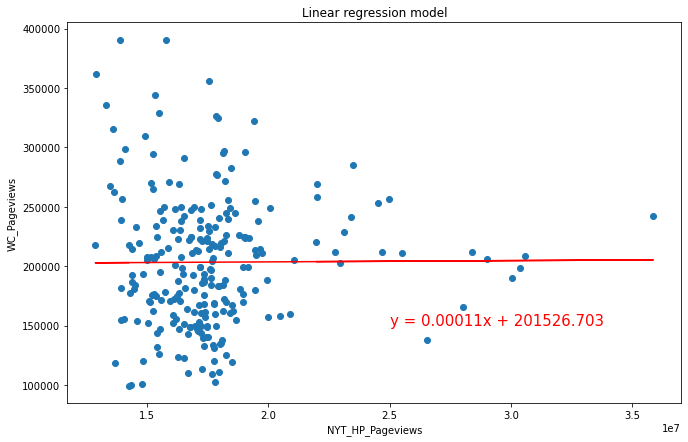

In [18]:
# Plot regression model 
# Create a scatter plot of the x and y values.
plt.figure(figsize=(11,7))
plt.scatter(NYT_HP_Pageviews,WC_Pageviews)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(NYT_HP_Pageviews, regress_values, "r")
plt.annotate(line_eq, (25000000,150000), fontsize=15, color="red")
plt.title("Linear regression model")
plt.ylabel('WC_Pageviews')
plt.xlabel('NYT_HP_Pageviews')
plt.show()